In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
plt.style.use('ggplot')
import cufflinks as cf
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [8]:
df = pd.read_excel('movies.xlsx')

In [9]:
df.head()

,name,rating,genre,released,Year,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,"June 13, 1980 (United States)",1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344.0,Orion Pictures,98.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5481 entries, 0 to 5480
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5481 non-null   object 
 1   rating    5461 non-null   object 
 2   genre     5481 non-null   object 
 3   released  5481 non-null   object 
 4   Year      5481 non-null   int64  
 5   score     5478 non-null   float64
 6   votes     5478 non-null   float64
 7   director  5481 non-null   object 
 8   writer    5481 non-null   object 
 9   star      5480 non-null   object 
 10  country   5480 non-null   object 
 11  budget    5481 non-null   int64  
 12  gross     5422 non-null   float64
 13  company   5475 non-null   object 
 14  runtime   5479 non-null   float64
dtypes: float64(4), int64(2), object(9)
memory usage: 642.4+ KB


In [12]:
df['budget'] = df['budget'].astype('int64')
df

,name,rating,genre,released,Year,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,"June 13, 1980 (United States)",1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5476,Love by Drowning,R,Drama,"November 6, 2020 (United States)",2020,NaN,NaN,Justin Kreinbrink,C.E. Poverman,Nicky Whelan,United States,1000000,NaN,Dow Jazz Films,121.0
5477,The Robinsons,NaN,Action,"November 10, 2020 (United States)",2020,NaN,NaN,Directors,Aleks Alifirenko Jr.,Billy Hartmann,United States,10000,NaN,NaN,90.0
5478,More to Life,NaN,Drama,"October 23, 2020 (United States)",2020,3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,NaN,NaN,90.0
5479,Saving Mbango,NaN,Drama,"April 27, 2020 (Cameroon)",2020,5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,NaN,Embi Productions,NaN


In [44]:
# as 10 empresas com a maior média de retorno 
df.groupby('company').mean()['gross'].sort_values(ascending=False).head(10)

company
Marvel Studios                                                   1.255466e+09
Illumination Entertainment                                       1.097122e+09
Fairview Entertainment                                           9.665549e+08
B24                                                              8.806815e+08
Avi Arad Productions                                             8.560852e+08
Chris Morgan Productions                                         7.590569e+08
Jolie Pas                                                        7.584118e+08
Lucasfilm                                                        7.185352e+08
Marvel Entertainment                                             7.144215e+08
Beijing Dengfeng International Culture Communications Company    6.999925e+08
Name: gross, dtype: float64

In [45]:
# as 10 empresas com a maior média de investimento
df.groupby('company').mean()['budget'].sort_values(ascending=False).head(10)

company
B24                         245000000.0
Marvel Studios              222000000.0
Chris Morgan Productions    200000000.0
The Halcyon Company         200000000.0
C-2 Pictures                200000000.0
Jolie Pas                   180000000.0
Fairview Entertainment      175000000.0
FortyFour Studios           172500000.0
Marvel Entertainment        170000000.0
Roth Films                  170000000.0
Name: budget, dtype: float64

Text(0.5, 1.0, 'Relação entre Gênero e Retorno')

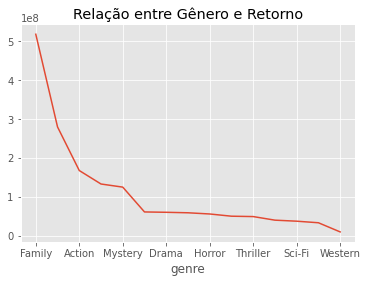

In [72]:
df.groupby('genre').mean()['gross'].sort_values(ascending=False).plot()
plt.title('Relação entre Gênero e Retorno')

Text(0.5, 1.0, 'Relação entre Gênero e Nota')

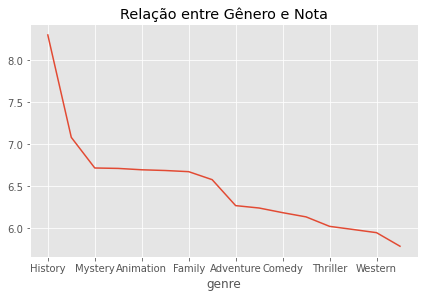

In [67]:
df.groupby('genre').mean()['score'].sort_values(ascending=False).plot()
plt.tight_layout()
plt.title('Relação entre Gênero e Nota')

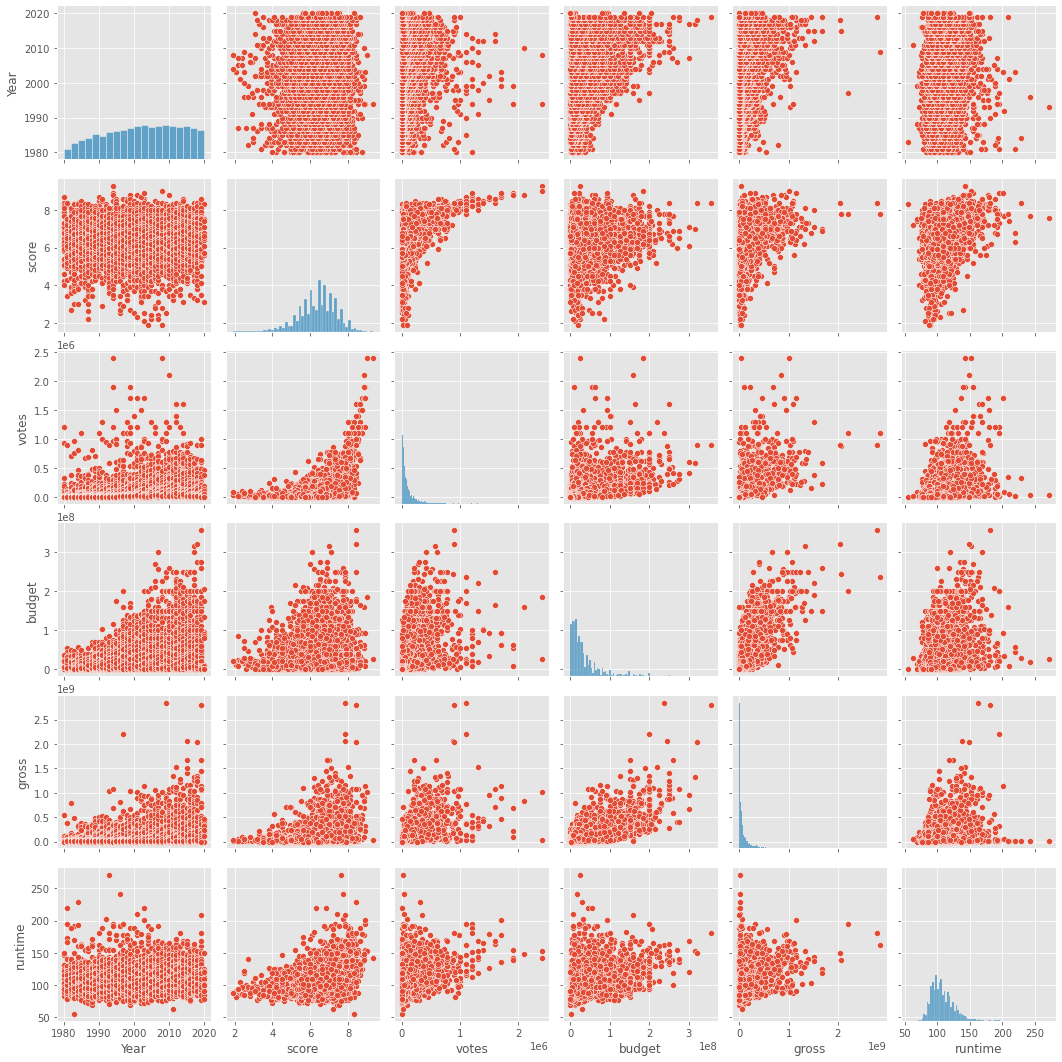

In [30]:
# investigando relações entre as colunas
sns.pairplot(df)

In [49]:
# investigando relações entre as colunas
df.corr(method = 'pearson')

,Year,score,votes,budget,gross,runtime
Year,1.000000,0.066357,0.205425,0.321048,0.268049,0.077853
score,0.066357,1.000000,0.472510,0.075841,0.222090,0.417268
votes,0.205425,0.472510,1.000000,0.441754,0.614587,0.352579
budget,0.321048,0.075841,0.441754,1.000000,0.740177,0.319960
gross,0.268049,0.222090,0.614587,0.740177,1.000000,0.275441
runtime,0.077853,0.417268,0.352579,0.319960,0.275441,1.000000


<AxesSubplot:>

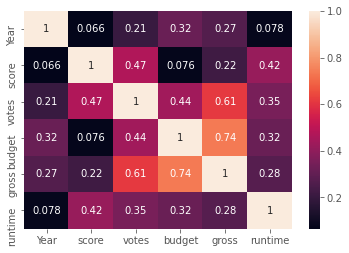

In [33]:
# investigando relações entre as colunas
sns.heatmap(df.corr(), annot = True)

C:\Users\BRUNO\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


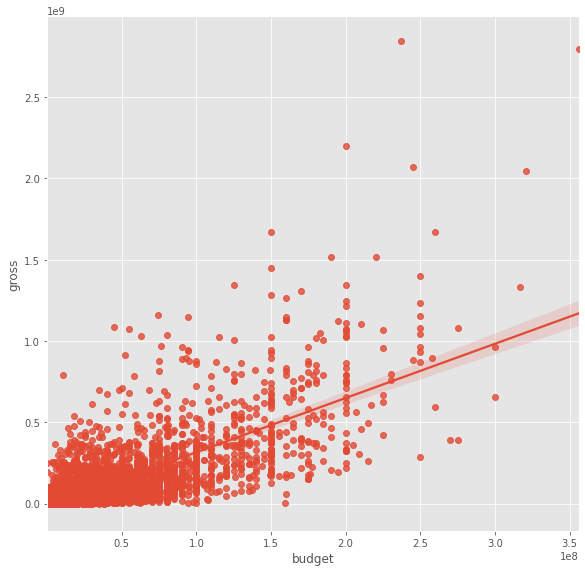

In [51]:
# Foi possível observar qe o budget tem uma correlação alta com o retorno da bilheteria
# Com base nisso, o seguinte gráfico de regressão foi plotado 
sns.lmplot(x='budget',y='gross',data=df, size = 8, palette = 'coolwarm')